In this first example, we will explore a simulated lightcurve that follows a damped random walk, which is often used to model variability in the optical flux of quasar.

In [61]:
import numpy as np
from matplotlib import pyplot as plt

In [62]:
from astroML.time_series import lomb_scargle, generate_damped_RW
from astroML.time_series import ACF_scargle
from astroML.time_series import ACF_EK

/home/sstueber/miniconda2/lib/python2.7/site-packages/astroML/time_series/periodogram.py:8: UserWarning: Using slow version of lomb_scargle. Install astroML_addons to use an optimized version
  warnings.warn("Using slow version of lomb_scargle. Install astroML_addons "


Use the numpy.arange method to generate 1000 days of data. 

In [63]:
tdays = np.arange(0, 1E3)
z = 2.0 # redshift
tau = 300 # damping timescale

Use the help function to figure out how to generate a dataset of this evenly spaced damped random walk over the 1000 days. 

In [64]:
drw=generate_damped_RW(tdays,tau,z)

In [65]:
for i in range(0,1000):
    drw[i]=drw[i]+np.random.normal(drw[i],0.1)

Randomly select a subsample of 200 data points from your generated dataset.  This is now *unevenly* spaced, and will serve as your observed lightcurve.

In [66]:
randSample=[0]*200
x=[0]*200
for i in range(0,200):
    x[i]=np.random.randint(0,1000)
    randSample[i]=drw[x[i]]
print(x)

[698, 780, 799, 747, 84, 107, 484, 737, 353, 654, 927, 713, 826, 199, 428, 636, 376, 265, 880, 184, 508, 761, 330, 702, 863, 374, 149, 173, 868, 648, 937, 512, 58, 313, 653, 244, 726, 608, 399, 203, 388, 932, 801, 791, 978, 595, 18, 762, 724, 894, 874, 513, 22, 488, 241, 575, 58, 963, 917, 725, 674, 15, 567, 748, 665, 392, 606, 770, 667, 442, 976, 861, 404, 803, 989, 322, 436, 30, 45, 61, 27, 740, 750, 164, 489, 15, 620, 66, 883, 712, 79, 338, 199, 135, 645, 765, 939, 977, 532, 902, 174, 292, 856, 411, 333, 824, 825, 521, 258, 178, 798, 736, 441, 627, 295, 753, 632, 704, 128, 917, 438, 84, 17, 872, 959, 74, 149, 926, 830, 200, 397, 710, 608, 347, 861, 443, 154, 945, 133, 258, 592, 214, 89, 56, 423, 917, 302, 637, 171, 639, 226, 405, 747, 830, 745, 73, 595, 134, 671, 52, 266, 763, 151, 517, 243, 546, 142, 104, 561, 922, 843, 336, 345, 823, 560, 421, 134, 922, 945, 335, 532, 493, 877, 823, 529, 79, 485, 710, 251, 162, 785, 109, 404, 89, 580, 801, 595, 984, 486, 798]


Plot the observed lightcurve.

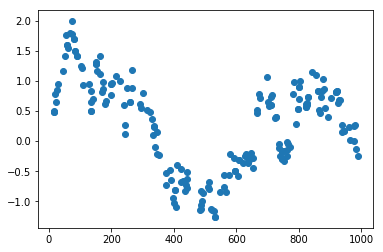

In [67]:
plt.scatter(x,randSample)
plt.show()

Use the help menu to figure out how to calculate the autocorrelation function of your lightcurve with ACF_scargle.  

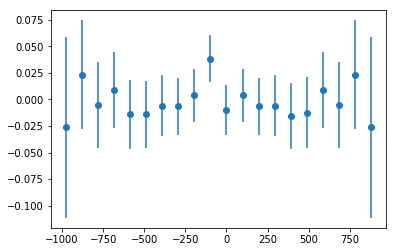

In [68]:
x=sorted(x)
acf=ACF_EK(x,randSample,0.1)
plt.errorbar(acf[2][:20],acf[0],yerr=acf[1],fmt='o')
plt.show()

In this next example, we will explore data drawn from a gaussian process.

In [69]:
from sklearn.gaussian_process import GaussianProcess
import numpy as np

Define a covariance function as the one dimensional squared-exponential covariance function described in class.  This will be a function of x1, x2, and the bandwidth h.  Name this function covariance_squared_exponential. 

In [70]:
def covariance_squared_exponential(x1,x2,h):
   return np.exp((x1-x2)**2/(2*h**2))

Generate values for the x-axis as 1000 evenly points between 0 and 10 using numpy.linspace. Define a bandwidth of h=1.

In [71]:
x=np.linspace(0,10,1000)
x=[float(x[i]) for i in range(len(x))]
h=1
print(x)

[0.0, 0.01001001001001001, 0.02002002002002002, 0.03003003003003003, 0.04004004004004004, 0.050050050050050046, 0.06006006006006006, 0.07007007007007007, 0.08008008008008008, 0.09009009009009009, 0.10010010010010009, 0.11011011011011011, 0.12012012012012012, 0.13013013013013014, 0.14014014014014015, 0.15015015015015015, 0.16016016016016016, 0.17017017017017017, 0.18018018018018017, 0.19019019019019018, 0.20020020020020018, 0.21021021021021022, 0.22022022022022023, 0.23023023023023023, 0.24024024024024024, 0.2502502502502503, 0.2602602602602603, 0.2702702702702703, 0.2802802802802803, 0.2902902902902903, 0.3003003003003003, 0.3103103103103103, 0.3203203203203203, 0.3303303303303303, 0.34034034034034033, 0.35035035035035034, 0.36036036036036034, 0.37037037037037035, 0.38038038038038036, 0.39039039039039036, 0.40040040040040037, 0.41041041041041043, 0.42042042042042044, 0.43043043043043044, 0.44044044044044045, 0.45045045045045046, 0.46046046046046046, 0.47047047047047047, 0.4804804804804

Generate an output of your covariance_squared_exponential with x as x1, x[:,None] as x2, and h as the bandwidth.

In [72]:
covariance_matrix=np.ndarray(shape=(1000,1000))
for i in range(1000):
    for j in range(1000):
        covariance_matrix[i][j]=covariance_squared_exponential(x[i],x[j],h)
print(covariance_matrix)

[[  1.00000000e+00   1.00005010e+00   1.00020042e+00 ...,   4.24487871e+21
    4.69108100e+21   5.18470553e+21]
 [  1.00005010e+00   1.00000000e+00   1.00005010e+00 ...,   3.84150282e+21
    4.24487871e+21   4.69108100e+21]
 [  1.00020042e+00   1.00005010e+00   1.00000000e+00 ...,   3.47680667e+21
    3.84150282e+21   4.24487871e+21]
 ..., 
 [  4.24487871e+21   3.84150282e+21   3.47680667e+21 ...,   1.00000000e+00
    1.00005010e+00   1.00020042e+00]
 [  4.69108100e+21   4.24487871e+21   3.84150282e+21 ...,   1.00005010e+00
    1.00000000e+00   1.00005010e+00]
 [  5.18470553e+21   4.69108100e+21   4.24487871e+21 ...,   1.00020042e+00
    1.00005010e+00   1.00000000e+00]]


Use numpy.random.multivariate_normal to generate a numpy array of the same length as your x-axis points. Each point is centered on 0 (your mean is a 1-d array of zeros), and your covariance is the output of your covariance_squared_exponential above.

In [73]:
distribution=np.random.multivariate_normal(mean=np.zeros(1000),cov=covariance_matrix)

/home/sstueber/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


Choose two values in your x-range as sample x values, and put in an array, x_sample_test.  Choose a function (e.g. numpy.cos) as your example function to constrain.

In [74]:
x_sample_test=np.zeros(2)
x_sample_test[0]=distribution[69]
x_sample_test[1]=distribution[549]
def f(x):
    return np.cos(x)

Define an instance of a gaussian proccess

In [75]:
gp = GaussianProcess(corr='squared_exponential', theta0=1000,
                      random_state=0)

/home/sstueber/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)


Fit the Gaussian process to data x1[:,None], with the output of the function on your sample x values (e.g. numpy.cos(x_sample_test) ).

In [76]:
z=np.atleast_2d(x).T
gp.fit(z,f(z).ravel())

/home/sstueber/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


GaussianProcess(beta0=None,
        corr=<function squared_exponential at 0x7fb3a073d578>,
        normalize=True, nugget=array(2.220446049250313e-15),
        optimizer='fmin_cobyla', random_start=1,
        random_state=<mtrand.RandomState object at 0x7fb3970c7730>,
        regr=<function constant at 0x7fb3a073d1b8>, storage_mode='full',
        theta0=array([[1000]]), thetaL=None, thetaU=None, verbose=False)

Predict on x1[:,None], and get the MSE values.  Plot the output function and function errors.

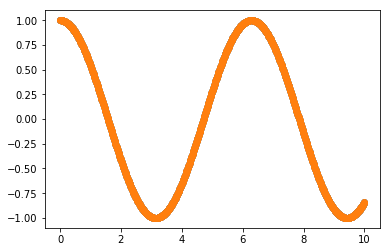

In [78]:

y_pred,MSE=gp.predict(z,eval_MSE=True)
plt.errorbar(x,y_pred,yerr=MSE,fmt='o')
plt.show()